In [36]:
%matplotlib inline

import os

import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt

from skimage import exposure 
from skimage.exposure import match_histograms 

import cv2

In [37]:
k=4

In [38]:
statdata=np.zeros((k,49)) #for dataframe creating

Test images

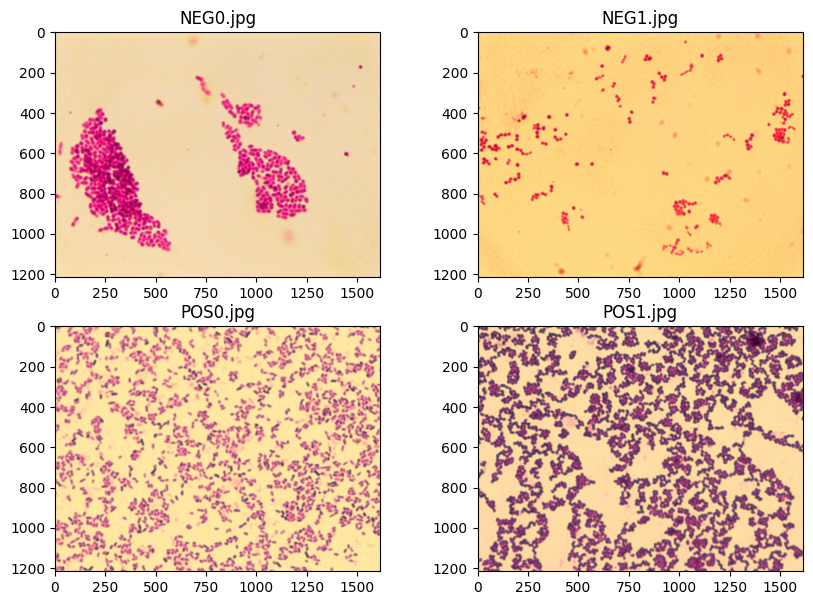

In [39]:
i1 = cv2.imread('NEG0.jpg')
i2 = cv2.imread('NEG1.jpg')
i3 = cv2.imread('POS0.jpg')
i4 = cv2.imread('POS1.jpg')
fig, axs = plt.subplots(2, 2, figsize=(10*1,7*1))
axs[0,0].imshow(i1[:,:,::-1]) 
axs[0,0].set_title('NEG0.jpg') 
axs[0,1].imshow(i2[:,:,::-1]) 
axs[0,1].set_title('NEG1.jpg') 
axs[1,0].imshow(i3[:,:,::-1]) 
axs[1,0].set_title('POS0.jpg') 
axs[1,1].imshow(i4[:,:,::-1]) 
axs[1,1].set_title('POS1.jpg') 
plt.show()


Displaying histograms of test images in different color spaces

NEG0.bmp
max= 224
argmax= 557626
mean= 165.77226908546118
var= 332.66876135072994 

max= 255
argmax= 639
mean= 195.518762824062
var= 2947.781793605207 

max= 255
argmax= 147
mean= 239.81664237558624
var= 270.3400772197142 



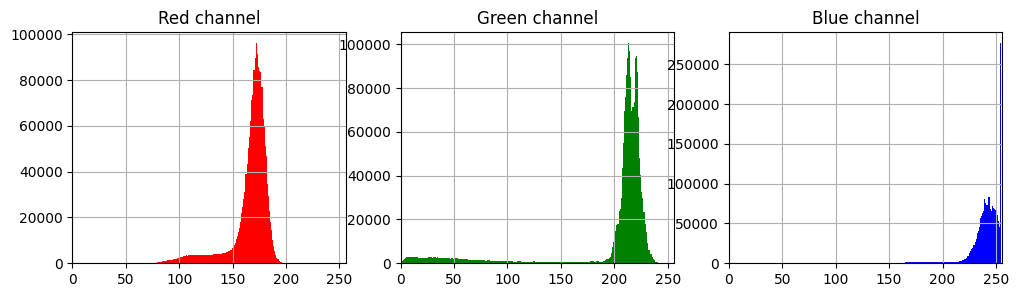

NEG1.bmp
max= 175
argmax= 462607
mean= 125.52309552501303
var= 76.29129543010114 

max= 245
argmax= 644679
mean= 207.40540015144606
var= 711.9176941806004 

max= 255
argmax= 0
mean= 254.5348046060774
var= 25.1796995142003 



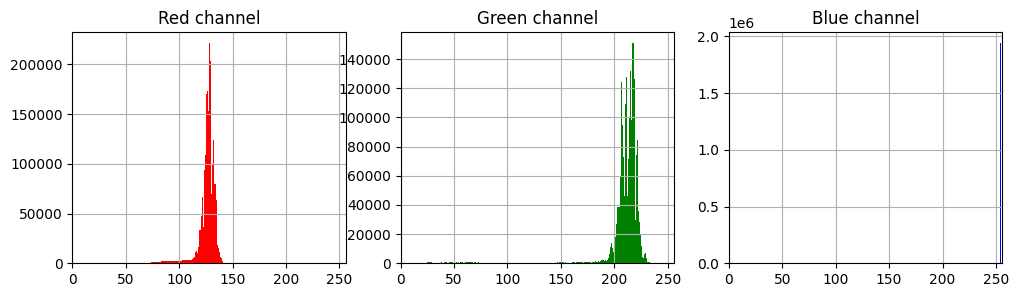

POS0.bmp
max= 181
argmax= 1355833
mean= 154.63333767587284
var= 139.3416001353236 

max= 239
argmax= 1354220
mean= 194.19228764981762
var= 2344.7639878750483 

max= 255
argmax= 0
mean= 238.54916450218212
var= 1180.0059368121213 



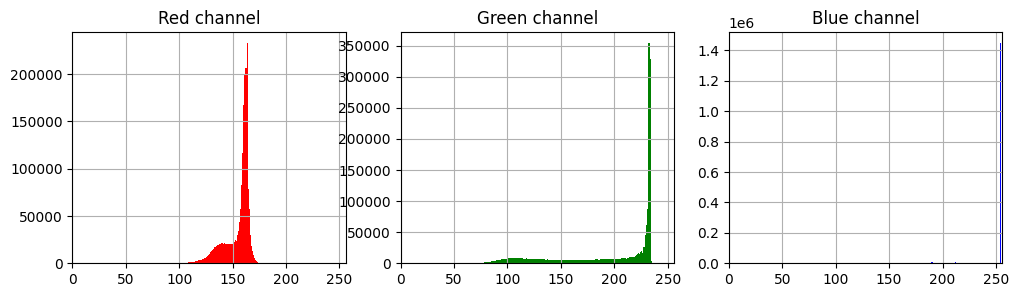

POS1.bmp
max= 184
argmax= 169642
mean= 138.6750927200039
var= 558.582291992242 

max= 235
argmax= 187412
mean= 155.24798021023318
var= 4717.460314354121 

max= 255
argmax= 56
mean= 200.04902252149557
var= 4317.473831566358 



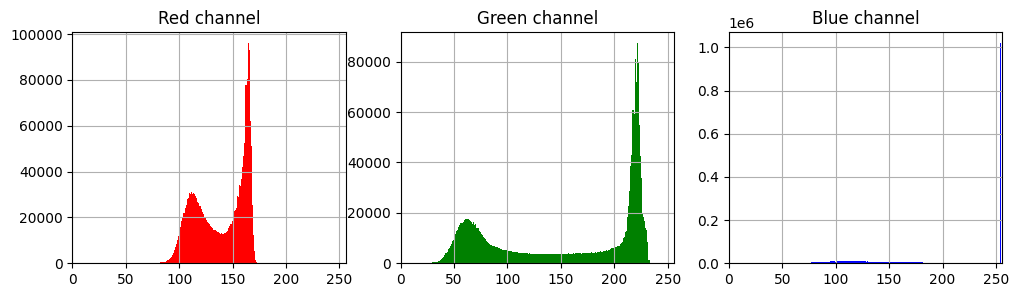

In [40]:
nameline=''
for i in range(0,k):
    if(i<2):
        nameline='NEG'+str(i)+'.bmp'
        statdata[i][48]=0
    if(i>=2):
        nameline='POS'+str(i-2)+'.bmp'
        statdata[i][48]=1
    print(nameline)    
    bacteria = cv2.imread(nameline)

    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    """
    axs[0,0].imshow(bacteria[:,:,0], cmap=plt.cm.gray)
    axs[0,1].imshow(bacteria[:,:,1], cmap=plt.cm.gray)
    axs[0,2].imshow(bacteria[:,:,2], cmap=plt.cm.gray)
    """

    axs[0].hist(bacteria[:,:,0].flatten(), bins=[el for el in range(256)], range=(0,256), color='r')
    axs[0].set_xlim((0, 256))
    axs[0].set_title("Red channel")
    axs[0].grid()
    print('max=',np.max(bacteria[:,:,0].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,0].flatten()))
    print('mean=',np.mean(bacteria[:,:,0].flatten()))
    print('var=',np.var(bacteria[:,:,0].flatten()),'\n')


    axs[1].hist(bacteria[:,:,1].flatten(), bins=[el for el in range(256)], range=(0,256), color='g')
    axs[1].set_xlim((0, 256))
    axs[1].set_title("Green channel")
    axs[1].grid()
    print('max=',np.max(bacteria[:,:,1].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,1].flatten()))
    print('mean=',np.mean(bacteria[:,:,1].flatten()))
    print('var=',np.var(bacteria[:,:,1].flatten()),'\n')

    axs[2].hist(bacteria[:,:,2].flatten(), bins=[el for el in range(256)], range=(0,256), color='b')
    axs[2].set_xlim((0, 256))
    axs[2].set_title("Blue channel")
    axs[2].grid()
    print('max=',np.max(bacteria[:,:,2].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,2].flatten()))
    print('mean=',np.mean(bacteria[:,:,2].flatten()))
    print('var=',np.var(bacteria[:,:,2].flatten()),'\n')

    for j in range(3):
        statdata[i][4*j+0]=np.max(bacteria[:,:,j].flatten())
        statdata[i][4*j+1]=np.argmax(bacteria[:,:,j].flatten())
        statdata[i][4*j+2]=np.mean(bacteria[:,:,j].flatten())
        statdata[i][4*j+3]=np.var(bacteria[:,:,j].flatten())
    

    plt.show()

NEG0.bmp
max= 248
argmax= 621
mean= 211.7554537885943
var= 974.9114066223797 

max= 215
argmax= 1141172
mean= 138.79833704484759
var= 456.37416959404436 

max= 181
argmax= 1225187
mean= 150.08874607135877
var= 98.48093819406154 



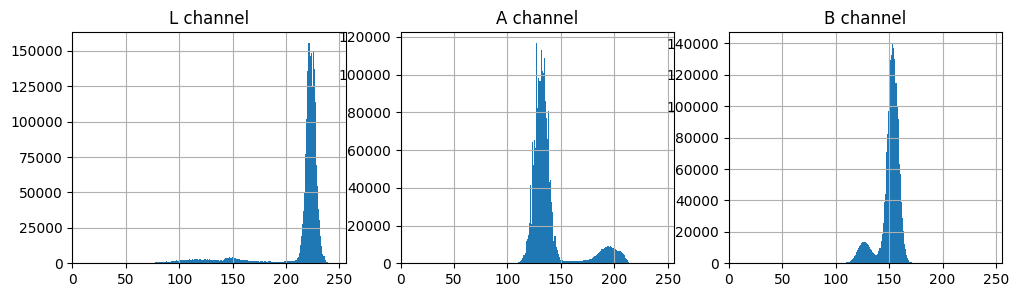

NEG1.bmp
max= 243
argmax= 950263
mean= 219.386106044815
var= 222.47383973875455 

max= 210
argmax= 557448
mean= 134.73871838766937
var= 123.62953747777983 

max= 200
argmax= 644679
mean= 174.9377335811295
var= 21.827811659202727 



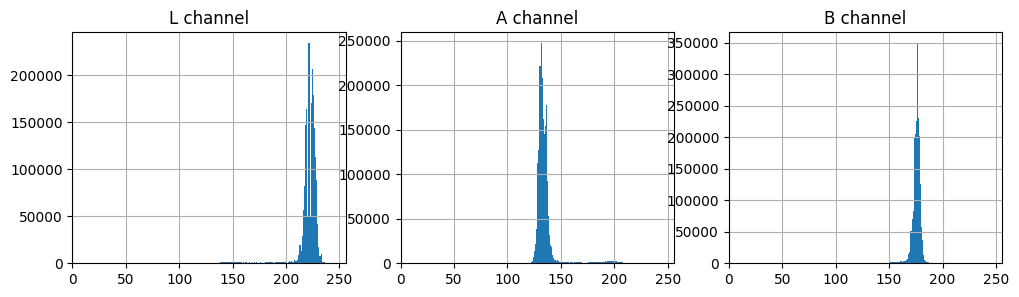

POS0.bmp
max= 240
argmax= 1354220
mean= 207.94558221241533
var= 1441.456400676776 

max= 193
argmax= 512242
mean= 138.91128293544816
var= 248.86416549923683 

max= 176
argmax= 1926559
mean= 153.62329826732673
var= 245.29139541540107 



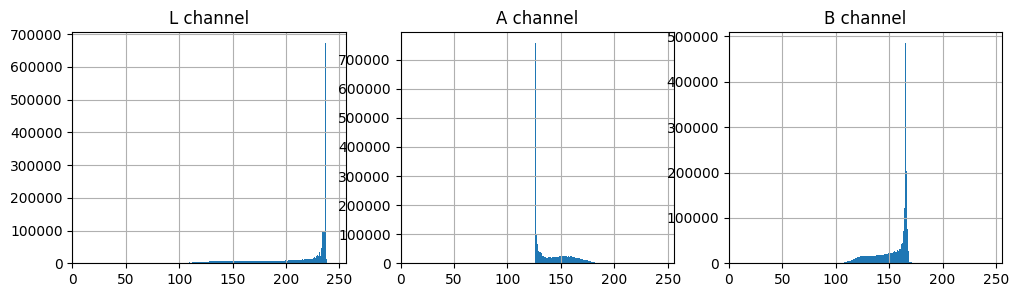

POS1.bmp
max= 238
argmax= 187412
mean= 171.96544780403204
var= 3745.4817852567853 

max= 196
argmax= 69209
mean= 143.34480798511595
var= 198.0900373770258 

max= 181
argmax= 1368506
mean= 142.07791228341586
var= 534.4524438354858 



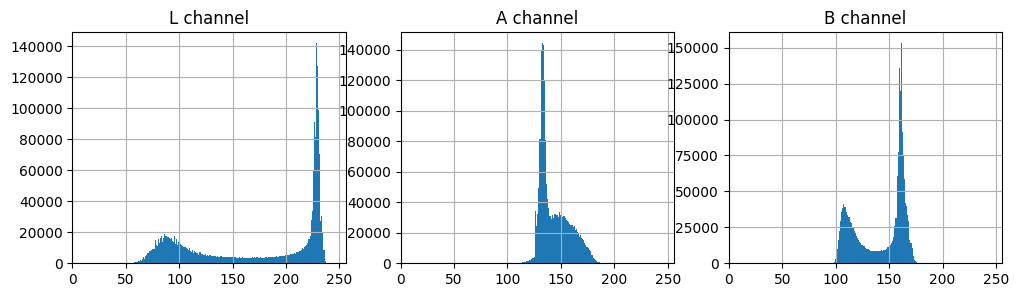

In [41]:
#LAB color space: Lightness ( Intensity ), color component ranging from Green to Magenta, color component ranging from Blue to Yellow
nameline=''
for i in range(0,k):
    if(i<2):
        nameline='NEG'+str(i)+'.bmp'
    if(i>=2):
        nameline='POS'+str(i-2)+'.bmp'
    print(nameline) 
    bacteria = cv2.imread(nameline)
    bacteria = cv2.cvtColor(bacteria, cv2.COLOR_BGR2LAB)

    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    """
    LABaxs[0,0].imshow(LAB_bact[:,:,0], cmap=plt.cm.gray)
    LABaxs[0,1].imshow(LAB_bact[:,:,1], cmap=plt.cm.gray)
    LABaxs[0,2].imshow(LAB_bact[:,:,2], cmap=plt.cm.gray)
    """

    axs[0].hist(bacteria[:,:,0].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[0].set_xlim((0, 256))
    axs[0].set_title("L channel")
    axs[0].grid()
    print('max=',np.max(bacteria[:,:,0].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,0].flatten()))
    print('mean=',np.mean(bacteria[:,:,0].flatten()))
    print('var=',np.var(bacteria[:,:,0].flatten()),'\n')

    axs[1].hist(bacteria[:,:,1].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[1].set_xlim((0, 256))
    axs[1].set_title("A channel")
    axs[1].grid()
    print('max=',np.max(bacteria[:,:,1].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,1].flatten()))
    print('mean=',np.mean(bacteria[:,:,1].flatten()))
    print('var=',np.var(bacteria[:,:,1].flatten()),'\n')

    axs[2].hist(bacteria[:,:,2].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[2].set_xlim((0, 256))
    axs[2].set_title("B channel")
    axs[2].grid()
    print('max=',np.max(bacteria[:,:,2].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,2].flatten()))
    print('mean=',np.mean(bacteria[:,:,2].flatten()))
    print('var=',np.var(bacteria[:,:,2].flatten()),'\n')

    for j in range(3):
        statdata[i][4*j+0+12]=np.max(bacteria[:,:,j].flatten())
        statdata[i][4*j+1+12]=np.argmax(bacteria[:,:,j].flatten())
        statdata[i][4*j+2+12]=np.mean(bacteria[:,:,j].flatten())
        statdata[i][4*j+3+12]=np.var(bacteria[:,:,j].flatten())    

    plt.show()


NEG0.bmp
max= 240
argmax= 767
mean= 205.39522283334418
var= 1336.4215905881697 

max= 246
argmax= 1406271
mean= 152.56524903107086
var= 423.43154795575003 

max= 165
argmax= 1137940
mean= 105.64854894720557
var= 162.0002358825744 



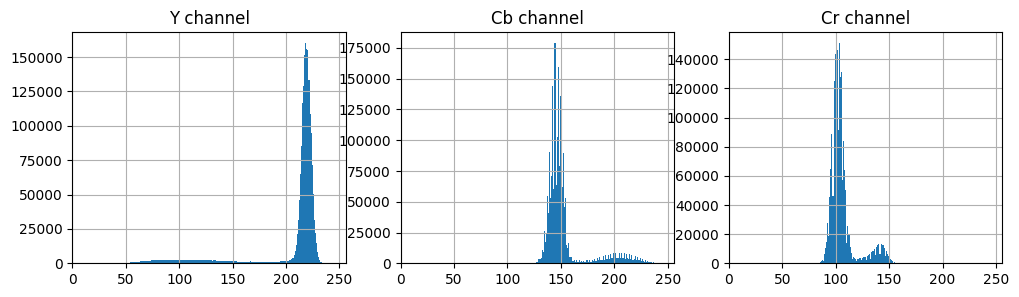

NEG1.bmp
max= 235
argmax= 1859179
mean= 212.14224938118812
var= 302.11542638732675 

max= 248
argmax= 812716
mean= 158.22989879168838
var= 109.24434316491312 

max= 147
argmax= 687152
mean= 79.13368779312141
var= 42.459669180927094 



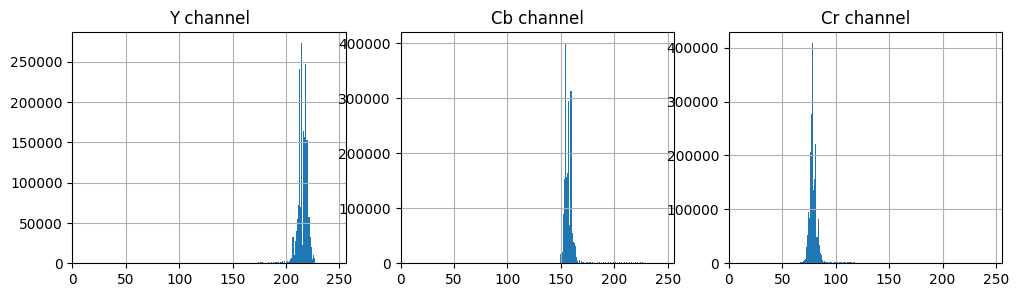

POS0.bmp
max= 236
argmax= 1354220
mean= 202.9908145111386
var= 1483.206909218834 

max= 202
argmax= 1441898
mean= 153.32478412828948
var= 142.72342650714634 

max= 153
argmax= 966028
mean= 100.73561873045857
var= 257.9508022088545 



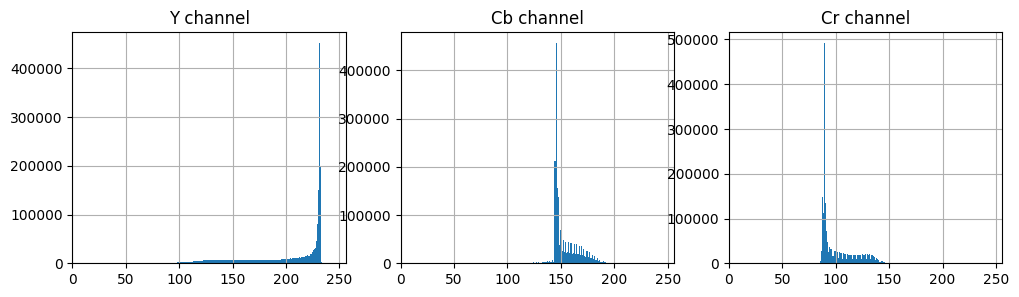

POS1.bmp
max= 234
argmax= 187412
mean= 166.74717310855263
var= 3802.4386214930328 

max= 209
argmax= 70825
mean= 151.76807887408808
var= 121.20569730833073 

max= 160
argmax= 93499
mean= 112.1727070373567
var= 521.2707514993814 



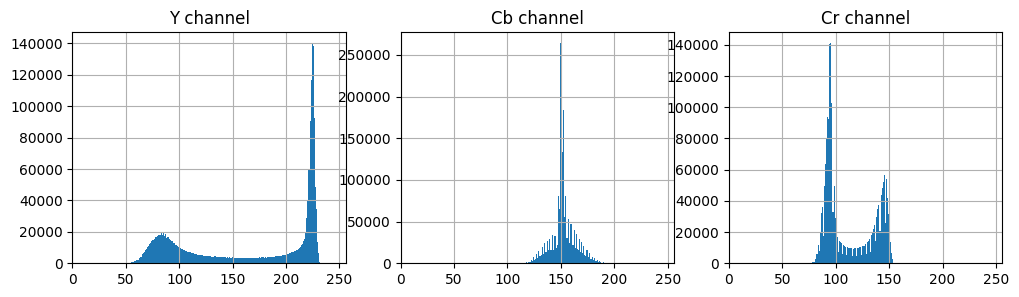

In [42]:
#YCbCr color space: Y – Luma component obtained from RGB after gamma correction, Cr=R–Y, Cb=B–Y
nameline=''
for i in range(0,k):
    if(i<2):
        nameline='NEG'+str(i)+'.bmp'
    if(i>=2):
        nameline='POS'+str(i-2)+'.bmp'
    print(nameline) 
    bacteria = cv2.imread(nameline)
    bacteria = cv2.cvtColor(bacteria, cv2.COLOR_BGR2YCrCb)

    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    """
    YCbCraxs[0,0].imshow(YCbCr_bact[:,:,0], cmap=plt.cm.gray)
    YCbCraxs[0,1].imshow(YCbCr_bact[:,:,1], cmap=plt.cm.gray)
    YCbCraxs[0,2].imshow(YCbCr_bact[:,:,2], cmap=plt.cm.gray)
    """

    axs[0].hist(bacteria[:,:,0].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[0].set_xlim((0, 256))
    axs[0].set_title("Y channel")
    axs[0].grid()
    print('max=',np.max(bacteria[:,:,0].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,0].flatten()))
    print('mean=',np.mean(bacteria[:,:,0].flatten()))
    print('var=',np.var(bacteria[:,:,0].flatten()),'\n')

    axs[1].hist(bacteria[:,:,1].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[1].set_xlim((0, 256))
    axs[1].set_title("Cb channel")
    axs[1].grid()
    print('max=',np.max(bacteria[:,:,1].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,1].flatten()))
    print('mean=',np.mean(bacteria[:,:,1].flatten()))
    print('var=',np.var(bacteria[:,:,1].flatten()),'\n')

    axs[2].hist(bacteria[:,:,2].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[2].set_xlim((0, 256))
    axs[2].set_title("Cr channel")
    axs[2].grid()
    print('max=',np.max(bacteria[:,:,2].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,2].flatten()))
    print('mean=',np.mean(bacteria[:,:,2].flatten()))
    print('var=',np.var(bacteria[:,:,2].flatten()),'\n')

    for j in range(3):
        statdata[i][4*j+0+24]=np.max(bacteria[:,:,j].flatten())
        statdata[i][4*j+1+24]=np.argmax(bacteria[:,:,j].flatten())
        statdata[i][4*j+2+24]=np.mean(bacteria[:,:,j].flatten())
        statdata[i][4*j+3+24]=np.var(bacteria[:,:,j].flatten()) 

    plt.show()

NEG0.bmp
max= 179
argmax= 34255
mean= 36.24959950250781
var= 2361.617673076395 

max= 255
argmax= 822762
mean= 89.54382063411933
var= 1737.1901811476098 

max= 255
argmax= 147
mean= 239.89900287828948
var= 268.0028572245472 



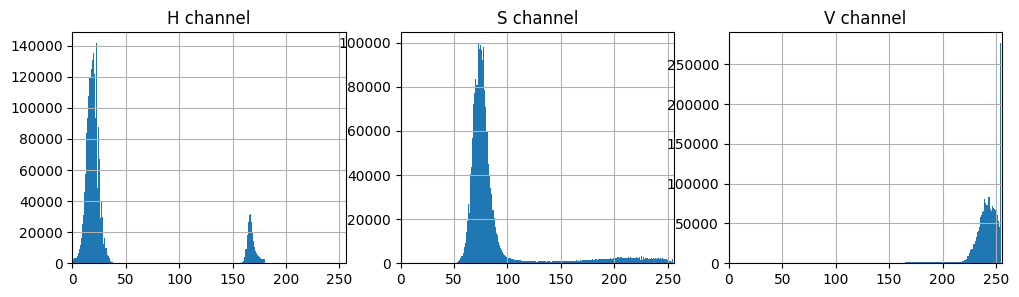

NEG1.bmp
max= 179
argmax= 80210
mean= 22.92875775550417
var= 487.33157398159733 

max= 255
argmax= 843420
mean= 130.17343933200885
var= 160.68385570372715 

max= 255
argmax= 0
mean= 254.5348046060774
var= 25.1796995142003 



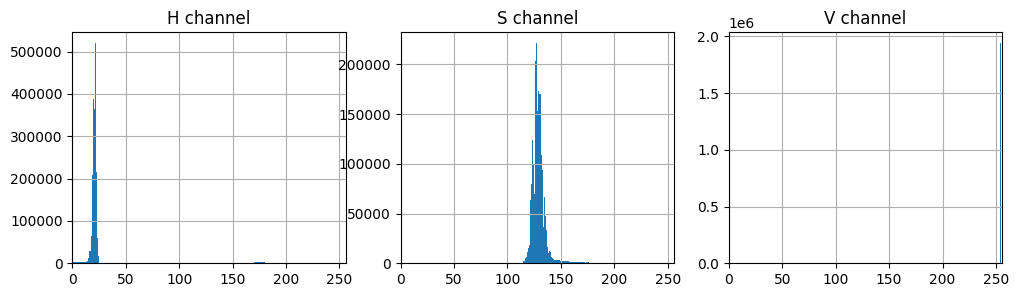

POS0.bmp
max= 179
argmax= 92
mean= 50.44311714271756
var= 3796.5042440256025 

max= 169
argmax= 702684
mean= 95.16758097479156
var= 161.47076041574144 

max= 255
argmax= 0
mean= 238.83049694258077
var= 1106.2216305352747 



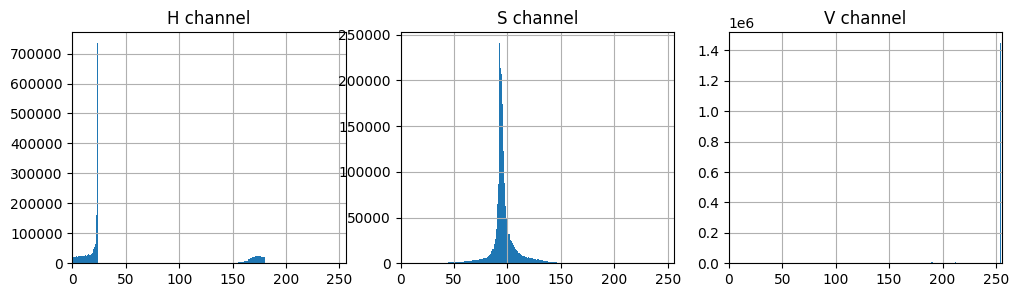

POS1.bmp
max= 179
argmax= 48
mean= 68.09125337903856
var= 4400.624692948483 

max= 255
argmax= 93498
mean= 101.49173713115555
var= 617.6057719656844 

max= 255
argmax= 56
mean= 202.6359101216454
var= 3793.915600546702 



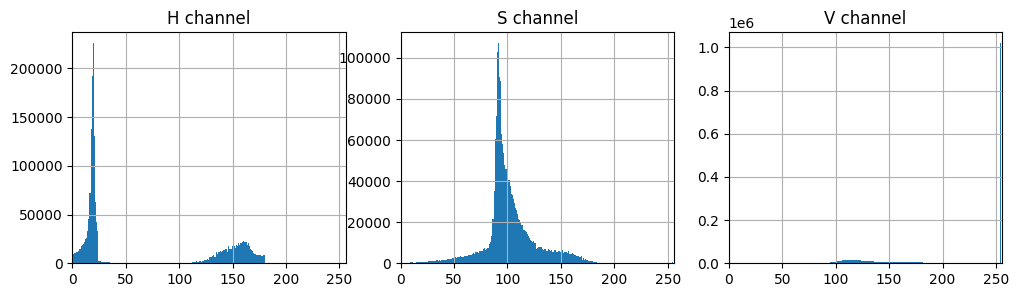

In [43]:
#HSV color space: H – Hue (Dominant Wavelength), S – Saturation (Purity/shades of the color), V – Value (Intensity)
nameline=''
for i in range(0,k):
    if(i<2):
        nameline='NEG'+str(i)+'.bmp'
    if(i>=2):
        nameline='POS'+str(i-2)+'.bmp'
    print(nameline) 
    bacteria = cv2.imread(nameline)
    bacteria = cv2.cvtColor(bacteria, cv2.COLOR_BGR2HSV)

    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    """
    axs[0,0].imshow(bacteria[:,:,0], cmap=plt.cm.gray)
    axs[0,1].imshow(bacteria[:,:,1], cmap=plt.cm.gray)
    axs[0,2].imshow(bacteria[:,:,2], cmap=plt.cm.gray)
    """
    
    axs[0].hist(bacteria[:,:,0].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[0].set_xlim((0, 256))
    axs[0].set_title("H channel")
    axs[0].grid()
    print('max=',np.max(bacteria[:,:,0].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,0].flatten()))
    print('mean=',np.mean(bacteria[:,:,0].flatten()))
    print('var=',np.var(bacteria[:,:,0].flatten()),'\n')

    axs[1].hist(bacteria[:,:,1].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[1].set_xlim((0, 256))
    axs[1].set_title("S channel")
    axs[1].grid()
    print('max=',np.max(bacteria[:,:,1].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,1].flatten()))
    print('mean=',np.mean(bacteria[:,:,1].flatten()))
    print('var=',np.var(bacteria[:,:,1].flatten()),'\n')

    axs[2].hist(bacteria[:,:,2].flatten(), bins=[el for el in range(256)], range=(0,256))
    axs[2].set_xlim((0, 256))
    axs[2].set_title("V channel")
    axs[2].grid()
    print('max=',np.max(bacteria[:,:,2].flatten()))
    print('argmax=',np.argmax(bacteria[:,:,2].flatten()))
    print('mean=',np.mean(bacteria[:,:,2].flatten()))
    print('var=',np.var(bacteria[:,:,2].flatten()),'\n')

    for j in range(3):
        statdata[i][4*j+0+36]=np.max(bacteria[:,:,j].flatten())
        statdata[i][4*j+1+36]=np.argmax(bacteria[:,:,j].flatten())
        statdata[i][4*j+2+36]=np.mean(bacteria[:,:,j].flatten())
        statdata[i][4*j+3+36]=np.var(bacteria[:,:,j].flatten()) 

    plt.show()

Trying histogram matching

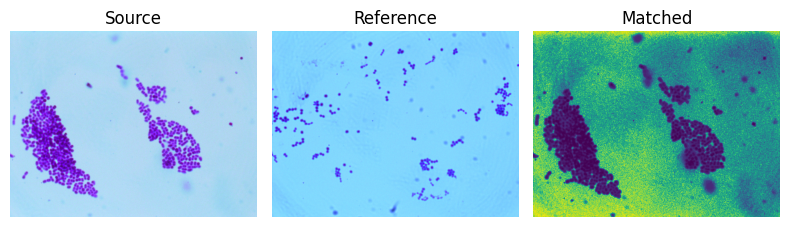

In [44]:
def m_h(source, target):
   # Convert images to grayscale if they are colored
    if len(source.shape) > 2:
        source = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    if len(target.shape) > 2:
        target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
    # Equalize histograms of both images
    source_equalized = cv2.equalizeHist(source)
    target_equalized = cv2.equalizeHist(target)
    # Calculate histograms
    source_hist = cv2.calcHist([source_equalized], [0], None, [256], [0, 256])
    target_hist = cv2.calcHist([target_equalized], [0], None, [256], [0, 256])
    # Normalize histograms
    source_hist /= source_equalized.size
    target_hist /= target_equalized.size
    # Compute CDFs
    source_cdf = np.cumsum(source_hist)
    target_cdf = np.cumsum(target_hist)
    # Map pixel values
    mapping = np.zeros(256, dtype = np.uint8)
    for i in range(256):
        mapping[i] = np.argmin(np.abs(source_cdf[i] - target_cdf))
    # Apply mapping to source image
    m = mapping[source_equalized]
    return m


source_image = cv2.imread('NEG0.jpg')
target_image = cv2.imread('NEG1.jpg')
matched_image = m_h(source_image, target_image)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(8, 3))
for aa in (ax1, ax2, ax3): 
    aa.set_axis_off() 
  
ax1.imshow(source_image) 
ax1.set_title('Source') 
ax2.imshow(target_image) 
ax2.set_title('Reference') 
ax3.imshow(matched_image) 
ax3.set_title('Matched') 
  
plt.tight_layout() 
plt.show() 



Creating dataframe and showing correlation matrix

In [45]:
df = pd.DataFrame(data=statdata)
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1.000000,-0.110309,0.798181,0.306198,0.789895,-0.623476,0.069114,0.265629,nan,0.959925,0.035640,-0.253229,0.789895,-0.703903,0.137876,-0.118250,0.606646,0.785489,0.135966,0.963862,-0.357967,0.036055,-0.401266,-0.217511,0.920091,-0.739367,0.136526,-0.022049,0.412655,0.429423,-0.475753,0.989730,0.838684,0.529952,0.446307,-0.114558,nan,-0.060673,-0.116996,0.011728,0.298740,0.252440,-0.653412,0.980394,nan,0.959925,0.025262,-0.252371,-0.439819
1,-0.110309,1.000000,0.432193,-0.604830,-0.032984,0.844945,0.457013,-0.346123,nan,-0.357290,0.425959,-0.396405,-0.032984,0.743885,0.452319,-0.357857,-0.375314,0.223164,-0.249624,0.134106,-0.427801,0.672072,0.091951,-0.245712,0.197947,0.411232,0.487201,-0.385034,-0.400944,0.768599,-0.014935,-0.027381,-0.264050,0.634763,-0.090486,-0.251383,nan,-0.287317,-0.079295,0.153383,-0.945530,0.465494,-0.312731,-0.297706,nan,-0.357290,0.418960,-0.380761,0.287542
2,0.798181,0.432193,1.000000,0.170002,0.476850,-0.100102,0.037062,0.316486,nan,0.669779,-0.013808,-0.166730,0.476850,-0.281018,0.096354,-0.015315,0.103539,0.630691,0.271884,0.929234,-0.772387,0.603144,-0.567935,-0.036064,0.817451,-0.591253,0.119403,0.052873,-0.107631,0.660275,-0.676752,0.798204,0.733119,0.644238,0.601075,0.054969,nan,-0.487549,0.152919,0.385369,-0.319747,0.213623,-0.918180,0.697464,nan,0.669779,-0.027644,-0.155413,0.032858
3,0.306198,-0.604830,0.170002,1.000000,-0.253065,-0.668168,-0.916364,0.955088,nan,0.530856,-0.921421,0.826677,-0.253065,-0.778975,-0.889636,0.876657,-0.191511,-0.344391,0.907587,0.240846,-0.451806,0.175938,-0.844721,0.800960,-0.081378,-0.861710,-0.895276,0.916012,-0.304059,-0.625824,-0.772340,0.167048,0.748042,-0.604601,0.839015,0.844122,nan,-0.572208,0.767996,0.663901,0.421529,-0.838343,-0.471370,0.447356,nan,0.530856,-0.923107,0.823806,0.383928
4,0.789895,-0.032984,0.476850,-0.253065,1.000000,-0.426947,0.618371,-0.363300,nan,0.670748,0.602010,-0.753534,1.000000,-0.376008,0.666934,-0.675806,0.909349,0.964005,-0.493177,0.706366,0.184392,-0.381665,0.244372,-0.759283,0.896093,-0.208056,0.655819,-0.600983,0.818186,0.613768,0.156172,0.857663,0.337553,0.751243,-0.195745,-0.689660,nan,0.518260,-0.701438,-0.585590,0.344881,0.733787,-0.139884,0.733777,nan,0.670748,0.595955,-0.756793,-0.862840
5,-0.623476,0.844945,-0.100102,-0.668168,-0.426947,1.000000,0.355155,-0.448793,nan,-0.800567,0.349463,-0.208204,-0.426947,0.971192,0.314191,-0.252333,-0.593000,-0.226185,-0.305336,-0.416233,-0.113617,0.481159,0.322075,-0.111588,-0.328953,0.742064,0.341588,-0.325344,-0.505020,0.387558,0.276655,-0.548405,-0.677121,0.232427,-0.344319,-0.172050,nan,-0.157307,-0.036714,0.077049,-0.893504,0.261501,0.129513,-0.762059,nan,-0.800567,0.349694,-0.196669,0.429462
6,0.069114,0.457013,0.037062,-0.916364,0.618371,0.355155,1.000000,-0.932507,nan,-0.158256,0.998636,-0.982142,0.618371,0.471739,0.997585,-0.993589,0.541903,0.671187,-0.948922,0.081358,0.466431,-0.324750,0.800819,-0.968172,0.425047,0.620339,0.996584,-0.995105,0.599650,0.745095,0.708268,0.209889,-0.477949,0.787795,-0.776361,-0.975712,nan,0.697667,-0.922867,-0.796929,-0.179285,0.981494,0.347124,-0.065034,nan,-0.158256,0.997823,-0.981605,-0.680541
7,0.265629,-0.346123,0.316486,0.955088,-0.363300,-0.448793,-0.932507,1.000000,nan,0.445412,-0.948108,0.858670,-0.363300,-0.614382,-0.906365,0.924785,-0.405882,-0.377160,0.986805,0.280451,-0.679219,0.458889,-0.954127,0.881780,-0.079395,-0.835240,-0.900060,0.956037,-0.538625,-0.489997,-0.902655,0.130317,0.747777,-0.520443,0.945114,0.925195,nan,-0.789196,0.898145,0.852208,0.135303,-0.846890,-0.642007,0.366263,nan,0.445412,-0.952108,0.861000,0.593792
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,0.959925,-0.357290,0.669779,0.530856,0.670748,-0.800567,-0.158256,0

Creating separate arrays for G- and G+ microbiota and for different color spaces for further research

In [46]:
n=60
pos_RGB_data=np.zeros((n,3,1965056)) #depens on the number and the size of images -- to do later #now for 1616 x 1216
pos_LAB_data=np.zeros((n,3,1965056)) 
pos_YCbCr_data=np.zeros((n,3,1965056))
pos_HSV_data=np.zeros((n,3,1965056))

neg_RGB_data=np.zeros((n,3,1965056)) 
neg_LAB_data=np.zeros((n,3,1965056)) 
neg_YCbCr_data=np.zeros((n,3,1965056))
neg_HSV_data=np.zeros((n,3,1965056))

In [47]:
directory = 'negative'
i=0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    f = os.path.join(directory, filename)
    #print(f)      
    bacteria = cv2.imread(f)
    LAB_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2LAB)
    YCbCr_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2YCrCb)
    HSV_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2HSV)

    curr=np.array([np.array(bacteria[:,:,0].flatten()),np.array(bacteria[:,:,1].flatten()),np.array(bacteria[:,:,2].flatten())])
    neg_RGB_data[i]=curr
    curr=np.array([np.array(LAB_bact[:,:,0].flatten()),np.array(LAB_bact[:,:,1].flatten()),np.array(LAB_bact[:,:,2].flatten())])
    neg_LAB_data[i]=curr
    curr=np.array([np.array(YCbCr_bact[:,:,0].flatten()),np.array(YCbCr_bact[:,:,1].flatten()),np.array(YCbCr_bact[:,:,2].flatten())])
    neg_YCbCr_data[i]=curr
    curr=np.array([np.array(HSV_bact[:,:,0].flatten()),np.array(HSV_bact[:,:,1].flatten()),np.array(HSV_bact[:,:,2].flatten())])
    neg_HSV_data[i]=curr
    i+=1

directory = 'positive'
i=0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    f = os.path.join(directory, filename)
    #print(f)      
    bacteria = cv2.imread(f)
    LAB_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2LAB)
    YCbCr_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2YCrCb)
    HSV_bact = cv2.cvtColor(bacteria, cv2.COLOR_BGR2HSV)

    curr=np.array([np.array(bacteria[:,:,0].flatten()),np.array(bacteria[:,:,1].flatten()),np.array(bacteria[:,:,2].flatten())])
    pos_RGB_data[i]=curr
    curr=np.array([np.array(LAB_bact[:,:,0].flatten()),np.array(LAB_bact[:,:,1].flatten()),np.array(LAB_bact[:,:,2].flatten())])
    pos_LAB_data[i]=curr
    curr=np.array([np.array(YCbCr_bact[:,:,0].flatten()),np.array(YCbCr_bact[:,:,1].flatten()),np.array(YCbCr_bact[:,:,2].flatten())])
    pos_YCbCr_data[i]=curr
    curr=np.array([np.array(HSV_bact[:,:,0].flatten()),np.array(HSV_bact[:,:,1].flatten()),np.array(HSV_bact[:,:,2].flatten())])
    pos_HSV_data[i]=curr
    i+=1